# **5.3 커널 PCA를 사용하여 비선형 매핑**

많은 머신러닝 알고리즘은 입력 데이터가 선형적으로 구분 가능하다고 가정한다.<br>
하지만 **실전** 애플리케이션에서는 **비선형 문제**를 더 자주 보게 될 것이다.

<br>

**비선형 문제를 다룰 때** PCA나 LDA 같은 선형 변환 기법을 사용하기보다 **PCA의 커널화 버전(KPCA)**을 사용하는 것이 더 좋다.<br>
**커널 PCA**는 선형적으로 구분되지 않는 데이터를 **선형** 분류기에 적합한 새로운 저차원 부분 공간으로 변환**한다.

<br>

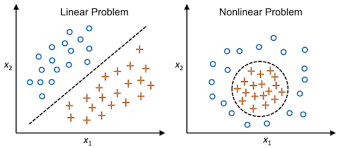

<br>
커널 PCA는 커널 SVM 개념과 관계가 있다. 

--- 

<br>


## **5.3.1 커널 함수와 커널 트릭**

커널 SVM에서 **'비선형 문제를 해결하기 위해 클래스가 선형으로 구분되는 새로운 고차원 특성 공간으로 투영할 수 있다'**는 내용을 배웠다.

<br>

                                                                k 고차원 부분 공간에 있는 샘플
$$x \in \mathbb{R}^d$$

                                                               를 변환하기 위해 비선형 매핑 함수 φ(phi)를 정의한다.


$$\phi : \mathbb{R}^d \rightarrow \mathbb{R}^k (k >> d)$$


<br>

**φ(phi) 함수**를 d차원의 원본 데이터셋에서 더 큰 k차원의 특성 공간으로 매핑하기 위해 **원본 특성의 비선형 조합을 만드는 함수**로 생각할 수 있다.

<br>

ex) **2차원(d=2)의 특성 벡터**가 있으면(**x는 d개의 특성으로 구성된 열 벡터**), 매핑 가능한 3D 공간은 다음과 같다.

                                    2차원(d=2)의 특성 벡터 = 
$$x \in \mathbb{R}^d$$


                                    매핑 가능한 3D 공간
$$x = [x_1, x_2]^T$$
$$\downarrow \phi$$
$$z = [x^2_1, \sqrt{2 x_1 x_2} , x^2_2]^T$$

<br>

1. **커널 PCA**를 통한 **비선형 매핑을 수행**하여 데이터를 **고차원 공간으로 변환**한 뒤,
2. **고차원 공간에 표준 PCA를 사용**하여 샘플이 선형 분류기로 구분될 수 있는 **저차원 공간으로 데이터를 투영**한다. 

<br>

**단점**<br>
계산 비용이 비싸다

<br>

이 때 **커널 트릭(kernel trick)**이 등장한다.<br>
커널 트릭을 사용하면 원본 특성 공간에서 **두 고차원 특성 벡터의 유사도를 계산**할 수 있다.

<br>


### **커널 함수**
- 두 벡터 사이의 점곱을 계산할 수 있는 함수
- 즉, 유사도를 측정할 수 있는 함수

<br>

**널리 사용되는 커널 함수**
- **다항 커널**: *θ는 임계 값이고 P는 사용자가 지정한 거듭제곱이다.*
$$\kappa(x^{(i)}, x^{(j)}) = (x^{(i)T} x^{(j)} + \theta)^P$$

- **하이퍼볼릭 탄젠트**(hyperbolic tangent) (**시그모이드**(sigmoid)) 커널
$$\kappa(x^{(i)}, x^{(j)}) = tanh(\eta x^{(i)T} x^{(j)} + \theta)$$

- **방사 기저 함수(Radial Basis Function, RBF)** 또는 가우시안 커널
$$\kappa(x^{(i)}, x^{(j)}) = exp(- \frac{\|x^{(i)} - x^{(j)}\|^2}{2 \sigma^2})$$
  - 변수 γ = 1/2σ^2을 도입하여 종종 다음과 같이 쓴다.
$$\kappa(x^{(i)}, x^{(j)}) = exp(-\gamma\|x^{(i)} - x^{(j)}\|^2)$$

<br>


### **RBF 커널 PCA를 구현하기 위한 세 단계**

1. **커널(유사도) 행렬 Κ**를 다음 식으로 **계산**한다.
$$\kappa(x^{(i)}, x^{(j)}) = exp(-\gamma\|x^{(i)} - x^{(j)}\|^2)$$

  - 샘플의 모든 쌍에 대해 구한다.
  - n개의 훈련 샘플이 담긴 데이터셋이라면 각 쌍의 유사도를 담은 대칭 커널 행렬은 ```n×n``` 차원이 된다.

$$m_i = \begin{bmatrix}
\kappa(x^{(1)}, x^{(1)}) \ \kappa(x^{(1)}, x^{(2)}) \ \cdots \ \kappa(x^{(1)}, x^{(n)})\\ 
\kappa(x^{(2)}, x^{(1)}) \ \kappa(x^{(2)}, x^{(2)}) \ \cdots \ \kappa(x^{(2)}, x^{(n)})\\ 
\vdots  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \vdots \ \ \ \ \ \ \ \ \ \ \ \ \ \ddots \ \ \ \ \ \ \ \ \ \ \vdots\\ 
\kappa(x^{(n)}, x^{(1)}) \ \kappa(x^{(n)}, x^{(2)}) \ \cdots \ \kappa(x^{(n)}, x^{(n)})\\ 
\end{bmatrix} i \in \{1, 2, 3\}$$

<br>

2. 다음 식을 사용하여 **커널 행렬 Κ를 중앙에 맞춘다**.
$$K' = K - 1_nK - K1_n + 1_nK1_n$$
  - 여기서 1_n은 모든 값이 1/n인 n×n차원 행렬이다.(커널 행렬과 같은 차원)
  - 사이킷런에는 커널을 중앙에 맞추기 위한 ```KernelCenterer``` 클래스를 제공한다.
```
from sklearn.preprocessing import KernelCenterer
K_centered = KernelCenterer().fit_transform(K)
```

<br>

3. 고윳값 크기대로 **내림차순으로 정렬**하여 중앙에 맞춘 커널 행렬에서 **최상위 k개의 고유 벡터를 고른다.**